<a href="https://colab.research.google.com/github/chiss7/breast-cancer-tensorflow/blob/main/BC2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/Colab Notebooks/Cancer de pecho w  batches - Tensorflow 2 (no keras)/utils.py' '/content'
!cp '/content/drive/MyDrive/Colab Notebooks/Cancer de pecho w  batches - Tensorflow 2 (no keras)/optimizers.py' '/content'

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from utils import Model
from optimizers import GradientDescent, Momentum, Adam

# Refreshing import to changes in utils.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
cancer_de_pecho = load_breast_cancer()
X = cancer_de_pecho["data"]
y = cancer_de_pecho["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

df_train = pd.DataFrame(X_train, columns=cancer_de_pecho["feature_names"])

In [ ]:
# X_train = np.transpose(np.array(X_train, dtype=np.float32))
# X_test = np.transpose(np.array(X_test, dtype=np.float32))
# y_train = np.array(y_train, dtype=np.float32)
# y_test = np.array(y_test, dtype=np.float32)

X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.76,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490
1,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.14530,0.06189,0.2446,0.07024
2,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.37910,0.15140,0.2837,0.08019
3,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
4,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.11170,0.07453,0.2725,0.07234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
422,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.54090,0.18130,0.4863,0.08633
423,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,18.81,27.37,127.10,1095.0,0.1878,0.4480,0.47040,0.20270,0.3585,0.10650
424,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.26040,0.13970,0.3151,0.08473


In [ ]:
X_train

array([[9.876e+00, 1.940e+01, 6.395e+01, ..., 9.749e-02, 2.622e-01,
        8.490e-02],
       [1.359e+01, 2.184e+01, 8.716e+01, ..., 6.189e-02, 2.446e-01,
        7.024e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
        8.019e-02],
       ...,
       [1.487e+01, 1.667e+01, 9.864e+01, ..., 2.027e-01, 3.585e-01,
        1.065e-01],
       [1.464e+01, 1.524e+01, 9.577e+01, ..., 1.397e-01, 3.151e-01,
        8.473e-02],
       [1.973e+01, 1.982e+01, 1.307e+02, ..., 2.507e-01, 2.749e-01,
        1.297e-01]], dtype=float32)

In [ ]:
# Data Normalization
# used in machine learning to scale the features of a dataset to a specified range. (0 - 1)
# It is particularly useful for binary classification problems.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.10700819, 0.327697  , 0.11402762, ..., 0.33501714, 0.20238328,
        0.25205877],
       [0.28889757, 0.41021308, 0.27912936, ..., 0.2126804 , 0.16742799,
        0.12759992],
       [0.38047898, 0.3304024 , 0.38255796, ..., 0.5202749 , 0.2450844 ,
        0.21207234],
       ...,
       [0.35158432, 0.2353737 , 0.360791  , ..., 0.69656354, 0.3936445 ,
        0.43543598],
       [0.3403203 , 0.18701383, 0.34037557, ..., 0.48006868, 0.3074479 ,
        0.2506155 ],
       [0.5895979 , 0.34190056, 0.5888462 , ..., 0.86151195, 0.22760671,
        0.6323968 ]], dtype=float32)

In [ ]:
def create_batches(array, batch_size):
  batches = []
  for i in range(0, len(array), batch_size):
    batch = array[i:i + batch_size]
    batches.append(batch)
  return batches

In [ ]:
X_train = create_batches(X_train, 16)
y_train = create_batches(y_train, 16)

In [ ]:
def transpose(batches):
  for i, batch in enumerate(batches):
    batches[i] = np.transpose(batches[i])
  return batches

In [ ]:
X_train = transpose(X_train)
X_test = np.transpose(X_test)

In [ ]:
# HYPER PARAMETERS
lr = 1e-3
arch = [30, 15]
num_epochs = 60

model = Model(arch)
optimizer = Adam(learning_rate=lr)
bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()

loss_list = []
accuracy_list = []
val_loss_list = []
val_accuracy_list = []

print("----------------------------------------")
print(model.title)
print(optimizer.title)
print("----------------------------------------")

# TRAIN MODEL
for epoch in range(num_epochs):
  print("Progress [", end="")
  for X_train_batch, y_train_batch in zip(X_train, y_train):
    # Gradients
    with tf.GradientTape() as t:
      # Loss
      loss = bin_cross_entropy(y_train_batch, model(X_train_batch))
      val_loss = bin_cross_entropy(y_test, model(X_test))

    grads = t.gradient(loss, model.Variables)

    # Apply Gradients (optimizer)
    model.Variables = optimizer.apply_gradients(model.Variables, grads)

    print("|", end="")
  print("] ", end="")

  loss_list.append(loss)
  val_loss_list.append(val_loss)

  # Accuracy
  accuracy = model.compute_accuracy(model(X_train_batch), y_train_batch)
  accuracy_list.append(accuracy)

  val_accuracy = model.compute_accuracy(model(X_test), y_test)
  val_accuracy_list.append(val_accuracy)

  print(f"Epoch: {epoch}, Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}, Val Accuracy: {val_accuracy:.2f}")

----------------------------------------
Model architecture -> input[30], hidden[30, 15], output[1]
Adam: learning rate = 0.001
----------------------------------------
Progress [|||||||||||||||||||||||||||] Epoch: 0, Loss: 1.7492, Val Loss: 1.9982, Accuracy: 0.30, Val Accuracy: 0.43
Progress [|||||||||||||||||||||||||||] Epoch: 1, Loss: 1.2911, Val Loss: 1.5544, Accuracy: 0.60, Val Accuracy: 0.52
Progress [|||||||||||||||||||||||||||] Epoch: 2, Loss: 1.0460, Val Loss: 1.2464, Accuracy: 0.60, Val Accuracy: 0.57
Progress [|||||||||||||||||||||||||||] Epoch: 3, Loss: 0.8530, Val Loss: 1.0054, Accuracy: 0.60, Val Accuracy: 0.62
Progress [|||||||||||||||||||||||||||] Epoch: 4, Loss: 0.6577, Val Loss: 0.8155, Accuracy: 0.70, Val Accuracy: 0.66
Progress [|||||||||||||||||||||||||||] Epoch: 5, Loss: 0.5152, Val Loss: 0.6721, Accuracy: 0.80, Val Accuracy: 0.69
Progress [|||||||||||||||||||||||||||] Epoch: 6, Loss: 0.4164, Val Loss: 0.5633, Accuracy: 0.80, Val Accuracy: 0.76
Progress [|||||||||

**Show Loss and Accuracy**


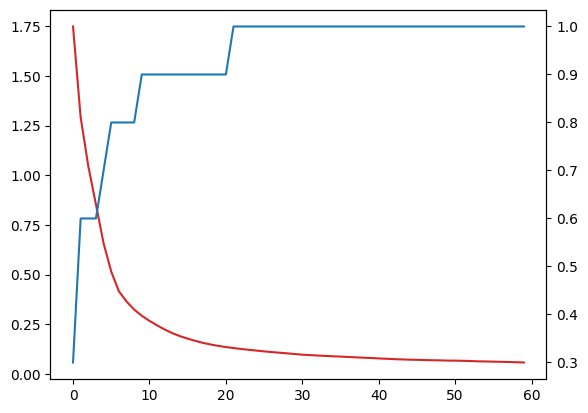

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list, "tab:blue")

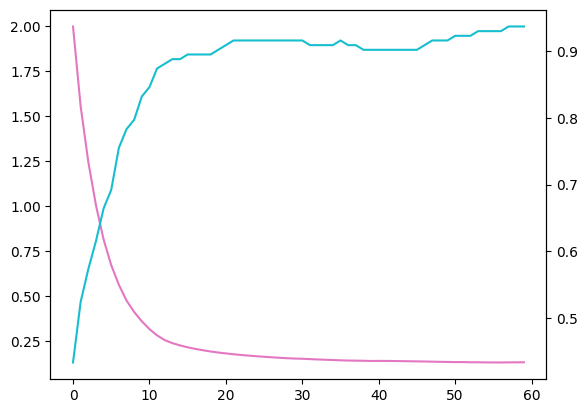

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(val_loss_list, "tab:pink")
ax2 = ax1.twinx()
ax2.plot(val_accuracy_list, "tab:cyan")

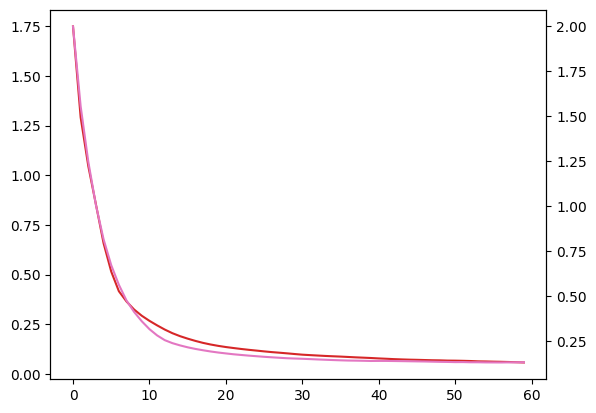

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(val_loss_list, "tab:pink")

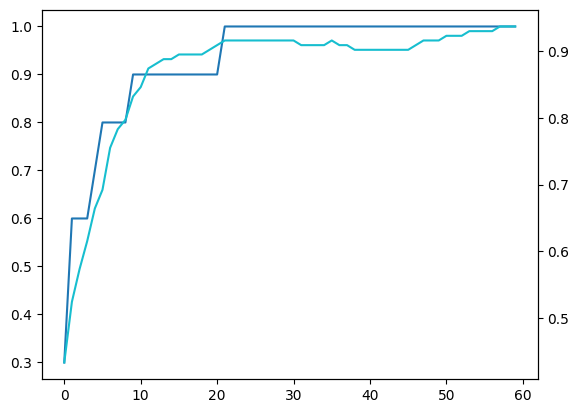

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(accuracy_list, "tab:blue")
ax2 = ax1.twinx()
ax2.plot(val_accuracy_list, "tab:cyan")

**Confusion Matrix**

In [ ]:
VP = 0
VN = 0
FP = 0
FN = 0
y_pred = model(X_test)

for X, y in zip(y_pred[0], y_test):
  if y == 1:
    if tf.equal(tf.round(X).numpy(), y):
      VP += 1
    else:
      FN += 1
  else:
    if tf.equal(tf.round(X).numpy(), y):
      VN += 1
    else:
      FP += 1

T_VP = VP/(VP + FN) * 100
T_VN = VN/(VN + FP) * 100
T_FN = FN/(FN + VP) * 100
T_FP = FP/(FP + VN) * 100

class_names = ['Positive', 'Negative']

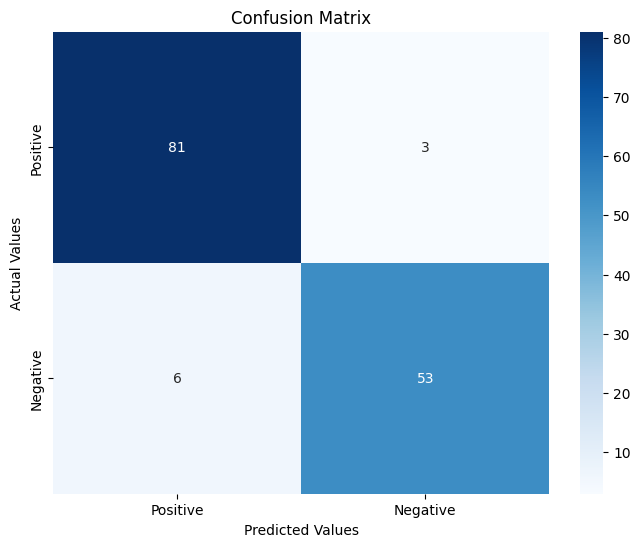

In [ ]:
confusion_matrix = np.array([[VP, FN], [FP, VN]])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

plt.show()

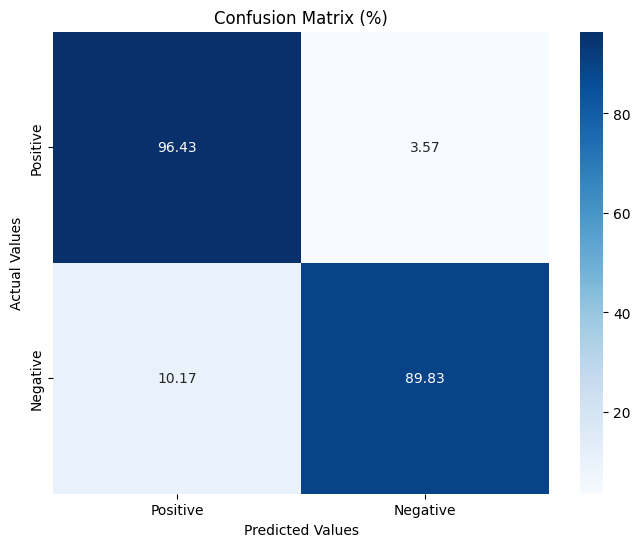

In [ ]:
confusion_matrix = np.array([[T_VP, T_FN], [T_FP, T_VN]])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (%)')

plt.show()